# Drop-out
- In a neural network overfitting is a common issue. So we use drop-out. It is all about deactivating some of the neurons. Here the network randomly shuffles and deactivate the neurons. It always increase generalization power of the model. We can say it reduces the overfitting of the model. And by drop-out the information loss is very less.
- It train the network in better way, as everytime we are hiding some part of the entire data to the network. By this way we show multiple samples to the network. And here the hiding is random.
- Generally drop-out increases the acuracy of the model by 2-3%. But there is a rare cance that it may increase upto 10%.
- We always set drop-out value(p) in between 0 - 0.5

Github: https://github.com/saisubhasish

In [1]:
#Importing required packages

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Generating train and test Data

In [17]:
x_train = np.linspace(-1, 1, 20)

In [18]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485]) 

In [19]:
x_test = np.linspace(-1, 1, 20)

In [20]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

### Plotting train-test data

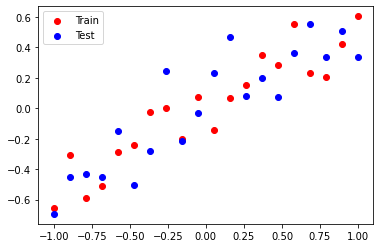

In [21]:
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

####Report:
- Dataset is showing linear relationship

## Making Regression Model

In [22]:
# Model building -->> ANN

model_1 = Sequential()

model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))     # linear

adam = Adam(learning_rate=0.01)        ## Faster
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model_1.fit(x_train, y_train, epochs=500, validation_data = (x_test, y_test),verbose=False)  ## Fitting model

In [23]:
# Model Evaluation

_, train_mse = model_1.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(x_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004631746094673872, Test: 0.046696700155735016


Report:
- There is a huge difference between train validation error and test validation error.
- As Train error is lesser than test error, shows over-fitting.

In [24]:
y_pred_1 = model_1.predict(x_test)

1/1 [==============================] - 0s 70ms/step


## Defining the relationship

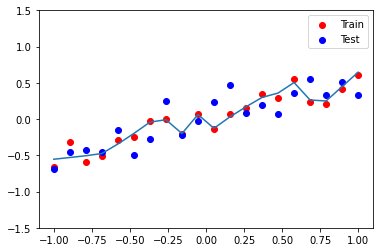

In [10]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

Report:
- Plot shows Train data is more linear than test data.
- Shows over-fitting

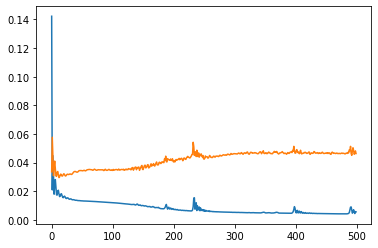

In [11]:
# Visualiztion validation loss(train-test plot)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Report:
- There is a big difference in train and test loss.

# Dropout Model
To handle over-fitting

In [29]:
# Making new model with dropout

model_2 = Sequential()

model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))                                             ## Adding drop-out after every layer
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))                                             ## Adding drop-out after every layer
model_2.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(x_train, y_train, epochs=500, validation_data = (x_test, y_test), verbose=False)

In [30]:
# evaluate the model

_, train_mse = model_2.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(x_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.017028048634529114, Test: 0.04039856791496277


Report:
- Difference between train error and test error is less

In [31]:
y_pred_2 = model_2.predict(x_test)

1/1 [==============================] - 0s 77ms/step


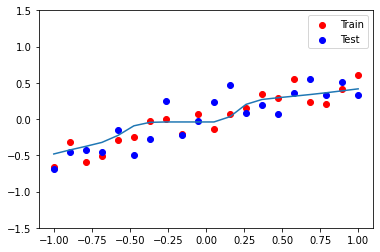

In [32]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

Report:
- Plot became smooth

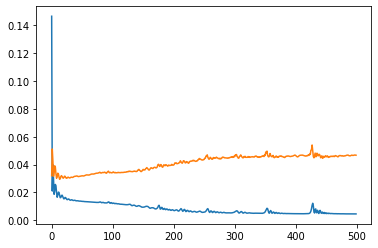

In [33]:
# Visualiztion validation loss(train-test plot)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Report:
- The difference between train loss and test loss reduced.